# DNN Model
Experimenting with DNN(Dense Neural Network), to optimize RSI strategy  
To discover relationship between RSI, closing price and volume that could reduce losing trades

Using RSI, closing price and volume as training features and positives/negative trade as labels

Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load csv file from rsi_fb.ipynb

In [2]:
data = pd.read_csv('C:\\Users\\Caspar\\Desktop\\python_project\\time series\\fb_rsi.csv')

# Preprocessing Training Data
There were twice as much profitable trades compared to losing trades, the model would overfit to predict profitable trade 2/3 of the time  
Filter a set of profitable trades to match the number of losing trades
 
Only training on long strategy to test results before training short strategy

In [3]:
remove_n = (data['close'][data['long_labels'] == 1]).count() - (data['close'][data['long_labels'] == 0]).count()

drop_rows = np.random.choice(data.index[data['long_labels'] == 1], remove_n, replace=False)
data = data.drop(drop_rows)

There are the same amount of profitable and losing trades
* label 1 for profitable trades
* label 0 for losing trades

In [4]:
print(data['close'][data['long_labels'] == 1].count())
print(data['close'][data['long_labels'] == 0].count())

5661
5661


Mapping labels to features

In [5]:
close= data['close'][(data['long_labels'] == 1) | (data['long_labels'] == 0)]
rsi = data['rsi'][(data['long_labels'] == 1) | (data['long_labels'] == 0)]
volume = data['volume'][(data['long_labels'] == 1) | (data['long_labels'] == 0)]
long_labels = data['long_labels'].dropna()


Preparing data for DNN model

In [6]:
df = pd.DataFrame(data={'close':close, 'rsi':rsi, 'volume':volume})

x_cloumns = df.columns
x = df[x_cloumns].values
y = long_labels


Spliting data for training and validation, using sklearn train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Building the model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Output either 1 or 0
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the model

In [10]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    verbose=2, epochs=15)


Epoch 1/15
284/284 - 1s - loss: 3.2275 - accuracy: 0.5045 - val_loss: 3.0373 - val_accuracy: 0.4848
Epoch 2/15
284/284 - 1s - loss: 2.4603 - accuracy: 0.5008 - val_loss: 1.1167 - val_accuracy: 0.5068
Epoch 3/15
284/284 - 1s - loss: 1.8751 - accuracy: 0.5001 - val_loss: 1.1756 - val_accuracy: 0.5007
Epoch 4/15
284/284 - 1s - loss: 1.3338 - accuracy: 0.5006 - val_loss: 0.8646 - val_accuracy: 0.4879
Epoch 5/15
284/284 - 1s - loss: 1.7077 - accuracy: 0.5026 - val_loss: 1.0272 - val_accuracy: 0.4861
Epoch 6/15
284/284 - 1s - loss: 1.0960 - accuracy: 0.4988 - val_loss: 1.1314 - val_accuracy: 0.4839
Epoch 7/15
284/284 - 1s - loss: 1.0934 - accuracy: 0.5026 - val_loss: 2.5747 - val_accuracy: 0.5170
Epoch 8/15
284/284 - 1s - loss: 1.0471 - accuracy: 0.5105 - val_loss: 0.8934 - val_accuracy: 0.4945
Epoch 9/15
284/284 - 1s - loss: 0.8404 - accuracy: 0.5050 - val_loss: 0.7782 - val_accuracy: 0.5064
Epoch 10/15
284/284 - 1s - loss: 0.8557 - accuracy: 0.5068 - val_loss: 0.7792 - val_accuracy: 0.5051

Plotting the loss against epochs

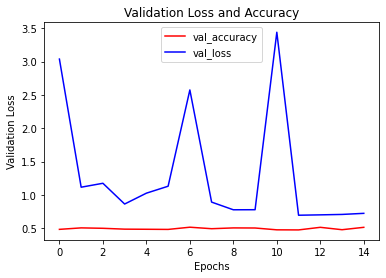

In [21]:
epochs = range(len(history.history['loss']))

plt.plot(epochs, history.history['val_accuracy'], 'r')
plt.plot(epochs, history.history['val_loss'], 'b')
plt.title('Validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['val_accuracy', 'val_loss'])

# Conclusion
Losses were decreasing through the epochs, however the accuracy was stuck at 50%  
Indicating that the model is not learning but making random guesses between the two output